In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import io
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Upload zipped dataset
print("📁 Please upload the 'titanic.zip' file (from Kaggle > Data tab)")
from google.colab import files
uploaded = files.upload()

📁 Please upload the 'titanic.zip' file (from Kaggle > Data tab)


Saving titanic.zip to titanic (2).zip


✅ Train and Test datasets loaded successfully!

Validation Accuracy: 0.776536312849162

Sample predictions on test dataset:
   Pclass  Sex   Age     Fare  Embarked  Survived_Prediction
0       3    0  34.5   7.8292         2                    0
1       3    1  47.0   7.0000         0                    1
2       2    0  62.0   9.6875         2                    0
3       3    0  27.0   8.6625         0                    0
4       3    1  22.0  12.2875         0                    1
5       3    0  14.0   9.2250         0                    0
6       3    1  30.0   7.6292         2                    1
7       2    0  26.0  29.0000         0                    0
8       3    1  18.0   7.2292         1                    1
9       3    0  21.0  24.1500         0                    0

Predicted survival counts:
Survived_Prediction
0    247
1    171
Name: count, dtype: int64

Classification Report on Validation Set:
               precision    recall  f1-score   support

           0   

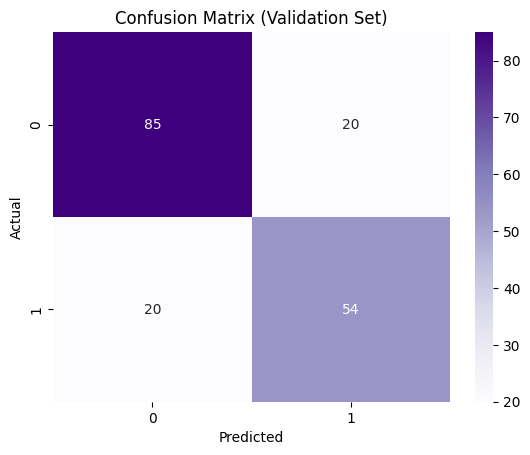

In [23]:
# 3. Extract train and test CSVs from ZIP
zip_file = zipfile.ZipFile(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

train_df = pd.read_csv(zip_file.open('train.csv'))
test_df = pd.read_csv(zip_file.open('test.csv'))

print("✅ Train and Test datasets loaded successfully!")

# 4. Data cleaning for train dataset (no warnings)
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 5. Data cleaning for test dataset (same as train)
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())  # test.csv has some missing Fare
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_passenger_ids = test_df['PassengerId']
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 6. Feature selection
X_train = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_train = train_df['Survived']
X_test = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# 7. Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

#calculating accuracy
model.fit(X_tr, y_tr)
val_preds = model.predict(X_val)
print("\nValidation Accuracy:", accuracy_score(y_val, val_preds))


# 9. Predict on test dataset
test_preds = model.predict(X_test)


# Display prediction results for test dataset
test_results = test_df.copy()
test_results['Survived_Prediction'] = test_preds

print("\nSample predictions on test dataset:")
print(test_results[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Survived_Prediction']].head(10))

# Show counts of predicted survival
print("\nPredicted survival counts:")
print(test_results['Survived_Prediction'].value_counts())


# 10. Show confusion matrix for validation set
print("\nClassification Report on Validation Set:\n", classification_report(y_val, val_preds))
sns.heatmap(confusion_matrix(y_val, val_preds), annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation Set)')
plt.show()